In [1]:
import numpy as np
import pandas as pd

# please make sure the file preprocessing.py is in place
import preprocessing as pp

# also, vectorization.py
import vectorization as vz

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
data = pd.read_csv('modified_dataset.csv')
data_copy = data
data_copy.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,13,eebbqej
1,"Now if he does off himself, everyone will thin...",13,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,7,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj


## Data Preprocessing

Using **unigrams**, **lemmatization**, and removal of **additional** stopwords.

In [3]:
# remove punctuations
data['pre'] = data['text'].apply(pp.remove_punctuations)

# unigram (or simply tokenization)
data['pre'] = data['pre'].apply(lambda x: pp.n_grams(x, n=1))

# lemmatize
data['pre'] = data['pre'].apply(pp.lem)

# remove stopwords
# define extra stopwords
stops = ['name']
data['pre'] = data['pre'].apply(lambda x: pp.remove_stopwords(x, sw=stops))

## Text vectorization

### Variation #1

using **Word2Vec**

In [4]:
import time
start = time.time()
print("Variation #1 - Word2Vec")
X1 = vz.Word2Vec(data['pre'])
print("Time elapsed:", time.time()-start)

Variation #1 - Word2Vec
Time elapsed: 115.48641514778137


### Variation #2

using **GloVe**

In [5]:
start = time.time()
print("Variation #2 - GloVe")
X2 = vz.GloVe(data['pre'])
print("Time elapsed:", time.time()-start)

Variation #2 - GloVe
Time elapsed: 447.52831077575684


## Split to train/test datasets

Using ``train_test_split`` from the ``sklearn.model_selection`` library. Setting ``random_state`` parameter to **14**, and ``test_size`` to **0.25**.

In [6]:
from sklearn.model_selection import train_test_split

# Split for Variation 1
X1_train, X1_test, y_train, y_test = train_test_split(X1, data['labels'].values, random_state=14, test_size=0.25)

# Split for variation 2
X2_train, X2_test, y_train, y_test = train_test_split(X2, data['labels'].values, random_state=14, test_size=0.25)

## Train the model 

Using **Bidirectional LSTM**
- Optimizer = Adam
- LSTM layer with 256 neurons with dropout of 0.7 

**For Variation #1**

In [7]:
X1_train = X1_train.reshape((X1_train.shape[0], 1, X1_train.shape[1]))
X1_test = X1_test.reshape((X1_test.shape[0], 1, X1_test.shape[1]))

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
print("Variation #1 - Word2Vec")
model1 = Sequential()

model1.add(Bidirectional(LSTM(256)))
model1.add(Dropout(0.7))
model1.add(Dense(14, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X1_train, y_train, batch_size=32, epochs=20, validation_split=0.25)

Variation #1 - Word2Vec
Epoch 1/20
954/954 [==============================] - 313s 89ms/step - loss: 1.9894 - accuracy: 0.3891 - val_loss: 1.7984 - val_accuracy: 0.4422
Epoch 2/20
954/954 [==============================] - 58s 61ms/step - loss: 1.7952 - accuracy: 0.4400 - val_loss: 1.7428 - val_accuracy: 0.4575
Epoch 3/20
954/954 [==============================] - 71s 74ms/step - loss: 1.7491 - accuracy: 0.4531 - val_loss: 1.7145 - val_accuracy: 0.4654
Epoch 4/20
954/954 [==============================] - 57s 60ms/step - loss: 1.7166 - accuracy: 0.4593 - val_loss: 1.7036 - val_accuracy: 0.4666
Epoch 5/20
954/954 [==============================] - 69s 72ms/step - loss: 1.6933 - accuracy: 0.4668 - val_loss: 1.6813 - val_accuracy: 0.4736
Epoch 6/20
954/954 [==============================] - 60s 63ms/step - loss: 1.6806 - accuracy: 0.4722 - val_loss: 1.6831 - val_accuracy: 0.4720
Epoch 7/20
954/954 [==============================] - 1653s 2s/step - loss: 1.6603 - accuracy: 0.4766 - val_los

**Variation #2**

In [9]:
X2_train = X2_train.reshape((X2_train.shape[0], 1, X2_train.shape[1]))
X2_test = X2_test.reshape((X2_test.shape[0], 1, X2_test.shape[1]))

In [10]:
model2 = Sequential()
print("Variation #2 - GloVe")
model2.add(Bidirectional(LSTM(256)))
model2.add(Dropout(0.7))
model2.add(Dense(14, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X2_train, y_train, batch_size=32, epochs=20, validation_split=0.25)

Variation #2 - GloVe
Epoch 1/20
954/954 [==============================] - 48s 46ms/step - loss: 1.9450 - accuracy: 0.3960 - val_loss: 1.7609 - val_accuracy: 0.4430
Epoch 2/20
954/954 [==============================] - 43s 45ms/step - loss: 1.7837 - accuracy: 0.4360 - val_loss: 1.7158 - val_accuracy: 0.4597
Epoch 3/20
954/954 [==============================] - 44s 46ms/step - loss: 1.7396 - accuracy: 0.4491 - val_loss: 1.6955 - val_accuracy: 0.4637
Epoch 4/20
954/954 [==============================] - 46s 48ms/step - loss: 1.7100 - accuracy: 0.4590 - val_loss: 1.6810 - val_accuracy: 0.4710
Epoch 5/20
954/954 [==============================] - 47s 49ms/step - loss: 1.6932 - accuracy: 0.4629 - val_loss: 1.6750 - val_accuracy: 0.4729
Epoch 6/20
954/954 [==============================] - 52s 55ms/step - loss: 1.6721 - accuracy: 0.4684 - val_loss: 1.6683 - val_accuracy: 0.4707
Epoch 7/20
954/954 [==============================] - 55s 57ms/step - loss: 1.6557 - accuracy: 0.4732 - val_loss: 1

## Model evaluation

#### Make predictions and visualize the confusion matrix

In [11]:
# Variation 1
from sklearn.metrics import confusion_matrix, classification_report
y1_pred = model1.predict(X1_test)

y1_pred = np.array([np.where(x == np.max(x))[0] for x in y1_pred])
print("Variation #1 - Word2Vec")
print(classification_report(y_test, y1_pred))
print("="*100)
print("Confusion Matrix",confusion_matrix(y_test, y1_pred), sep="\n\n")

424/424 [==============================] - 17s 37ms/step
Variation #1 - Word2Vec
              precision    recall  f1-score   support

           0       0.56      0.63      0.59      1302
           1       0.52      0.58      0.55       893
           2       0.45      0.28      0.34       460
           3       0.32      0.19      0.24       874
           4       0.33      0.07      0.12       760
           5       0.53      0.08      0.13       957
           6       0.41      0.25      0.31       667
           7       0.51      0.10      0.17       733
           8       0.79      0.79      0.79       712
           9       0.46      0.32      0.38       660
          10       0.59      0.41      0.48       812
          11       0.51      0.31      0.39       337
          12       0.46      0.19      0.27       327
          13       0.45      0.81      0.58      4072

    accuracy                           0.49     13566
   macro avg       0.49      0.36      0.38     13566

In [12]:
# Variation 2

y2_pred = model2.predict(X2_test)

y2_pred = np.array([np.where(x == np.max(x))[0] for x in y2_pred])
print("Variation #2 - GloVe")
print(classification_report(y_test, y2_pred))
print("="*100)
print("Confusion Matrix",confusion_matrix(y_test, y2_pred), sep="\n\n")

424/424 [==============================] - 14s 31ms/step
Variation #2 - GloVe
              precision    recall  f1-score   support

           0       0.56      0.64      0.60      1302
           1       0.56      0.57      0.57       893
           2       0.49      0.27      0.35       460
           3       0.37      0.21      0.27       874
           4       0.37      0.09      0.14       760
           5       0.40      0.11      0.18       957
           6       0.40      0.26      0.31       667
           7       0.50      0.11      0.18       733
           8       0.78      0.79      0.78       712
           9       0.47      0.31      0.37       660
          10       0.56      0.43      0.49       812
          11       0.48      0.31      0.37       337
          12       0.55      0.18      0.27       327
          13       0.45      0.81      0.58      4072

    accuracy                           0.49     13566
   macro avg       0.50      0.36      0.39     13566
we

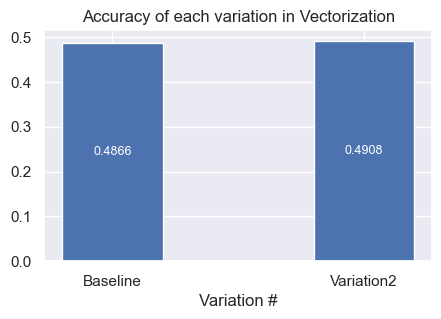

In [13]:
import seaborn
seaborn.set()
results=(y1_pred, y2_pred)
names = [('Variation'+str(i+1)) for i in range(len(results))]
names[0] = "Baseline"
from sklearn.metrics import accuracy_score

acc = [accuracy_score(y_test, y) for y in results]

import matplotlib.pyplot as plt
# plot the results

plt.figure(figsize=(5,3))
plt.bar(names, acc,0.4, label="Accuracy")
# plt.plot(names,acc, marker='.', color='red')
for i in range(len(acc)):
    plt.text(i, acc[i]/2, round(acc[i],4), fontdict={'size':9,'color':'white' }, ha='center', va='center')
plt.xlabel("Variation #")
plt.title("Accuracy of each variation in Vectorization")
plt.show()

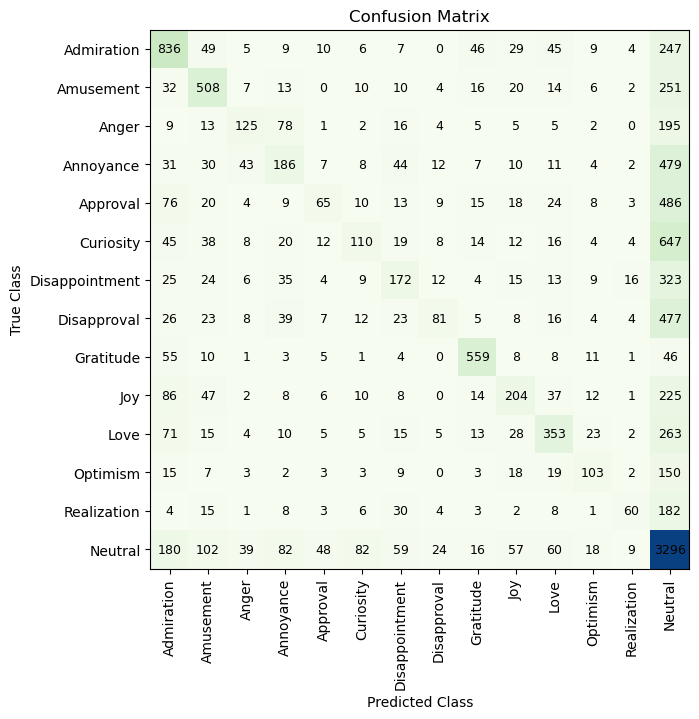

In [15]:
seaborn.reset_orig()
labs = ["Admiration", "Amusement", "Anger", "Annoyance", "Approval", "Curiosity", "Disappointment", "Disapproval", "Gratitude", "Joy", "Love", "Optimism", "Realization", "Neutral"]
cm = confusion_matrix(y_test, y2_pred)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap='GnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(i, j, cm[j,i],fontsize=9, ha='center', va='center')
plt.xticks(ticks=range(14), labels=labs, rotation=90)
plt.yticks(ticks=range(14), labels=labs)
plt.ylabel('True Class')
plt.show()